In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Diamond Price Prediction.csv")
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Carat(Weight of Daimond)  53940 non-null  float64
 1   Cut(Quality)              53940 non-null  object 
 2   Color                     53940 non-null  object 
 3   Clarity                   53940 non-null  object 
 4   Depth                     53940 non-null  float64
 5   Table                     53940 non-null  float64
 6   Price(in US dollars)      53940 non-null  int64  
 7   X(length)                 53940 non-null  float64
 8   Y(width)                  53940 non-null  float64
 9   Z(Depth)                  53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.duplicated().sum()

146

In [8]:
df = df.drop_duplicates()
df.shape

(53794, 10)

In [9]:
df.isnull().sum()

Carat(Weight of Daimond)    0
Cut(Quality)                0
Color                       0
Clarity                     0
Depth                       0
Table                       0
Price(in US dollars)        0
X(length)                   0
Y(width)                    0
Z(Depth)                    0
dtype: int64

- Tiny: Diamonds from 0.2 to 0.5 carats.
- Small: Diamonds from 0.5 to 1.0 carats.
- Moderate: Diamonds from 1.0 to 2.0 carats.
- Large: Diamonds from 2.0 to 3.0 carats.
- Very Large: Diamonds from 3.0 to 4.0 carats.
- Exceptional: Diamonds from 4.0 to 5.0 carats.
- Rare Gem: Diamonds from 5.0 to 5.1 carats

In [ ]:
t = df["Carat(Weight of Daimond)"]
frequency_bins = {
    'Tiny: 0 - 0.5': ((t >= 0) & (df["Carat(Weight of Daimond)"] <= 0.5)).sum(),
    'Small: 0.5 - 1.0': ((t > 0.5) & (t <= 1.0)).sum(),
    'Moderate: 1.0 - 2.0': ((t > 1.0) & (t <= 2.0)).sum(),
    'Large: 2.0 - 3.0': ((t > 2.0) & (t <= 3.0)).sum(),
    'Very Large: 3.0 - 4.0': ((t > 3.0) & (t <= 4.0)).sum(),
    'Exceptional: 4.0 - 5.0': ((t > 4.0) & (t <= 5.0)).sum(),
    'Rare Gem: More 5': (t > 5.0).sum()
}

# Convert the frequency bins dictionary into a DataFrame
carat_df = pd.DataFrame(list(frequency_bins.items()), columns=['Carat Range', 'Count'])

,Carat Range,Count
0,Tiny: 0 - 0.5,18863
1,Small: 0.5 - 1.0,17476
2,Moderate: 1.0 - 2.0,15582
3,Large: 2.0 - 3.0,1843
4,Very Large: 3.0 - 4.0,25
5,Exceptional: 4.0 - 5.0,4
6,Rare Gem: More 5,1


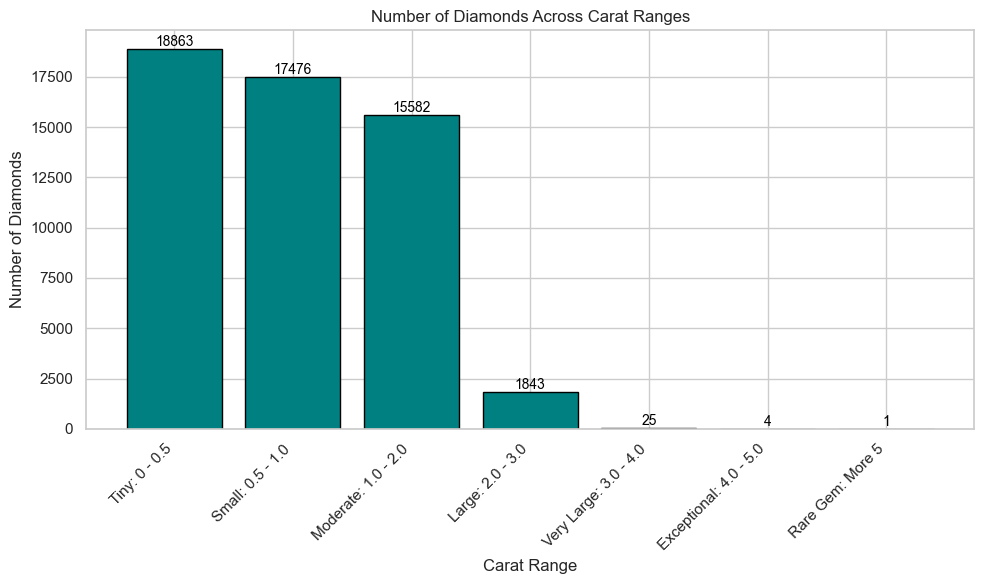

In [ ]:
#  Carat Range
plt.figure(figsize=(10, 6))
bars = plt.bar(carat_df['Carat Range'], carat_df['Count'], color='teal', edgecolor='black')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Carat Range')
plt.ylabel('Number of Diamonds')
plt.title('Number of Diamonds Across Carat Ranges')
for bar in bars:
    plt.annotate(
        f'{int(bar.get_height())}',  # Display the number as integer
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Annotate at the top of each bar
        ha='center', va='bottom', fontsize=10, color='black'
    )
plt.tight_layout()
plt.show()

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_2557/4027143681.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Cut(Quality)', data=df, palette="Set2")


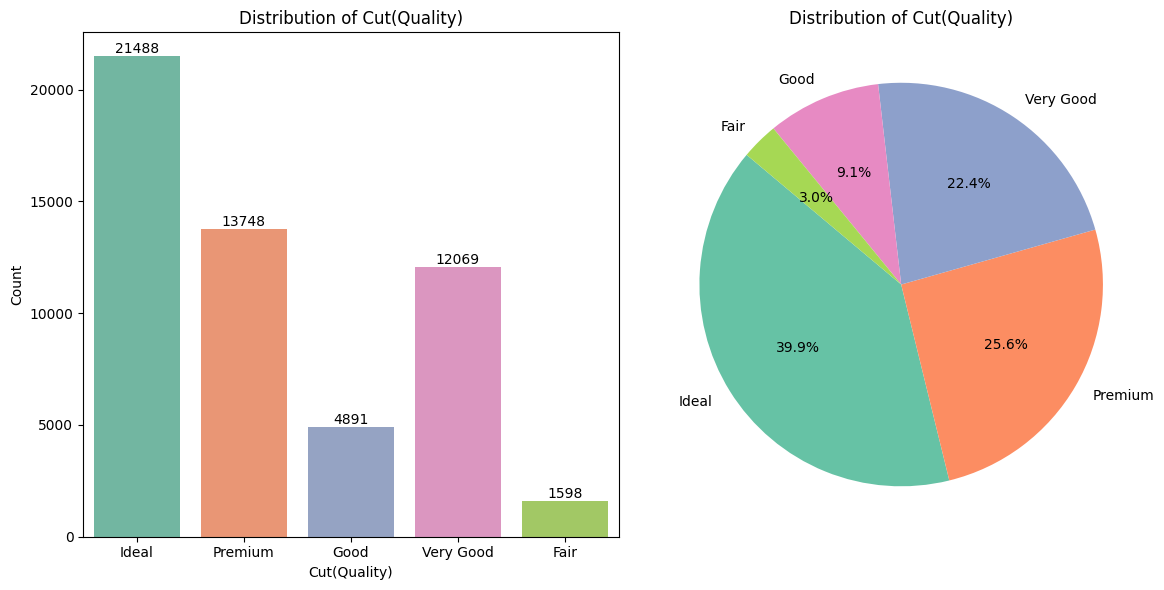

In [ ]:
# 'Cut(Quality)'
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot = sns.countplot(x='Cut(Quality)', data=df, palette="Set2")
plt.title("Distribution of Cut(Quality)")
plt.xlabel("Cut(Quality)")
plt.ylabel("Count") 
plt.xticks(rotation=0)
for bar in plot.patches:
    plot.annotate(
        format(bar.get_height(), '.0f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', va='bottom', fontsize=10, color='black'
    )



plt.subplot(1,2,2)
Cut_counts = df['Cut(Quality)'].value_counts()

plt.pie(
    Cut_counts,
    labels=Cut_counts.index,
    autopct='%1.1f%%',  # Display percentage
    startangle=140,
    colors=sns.color_palette("Set2", len(Cut_counts))  # Rotate for better view
)
plt.title("Distribution of Cut(Quality)")
plt.tight_layout() 
plt.show()

In [50]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [51]:
df["Color"].value_counts()

Color
G    11262
E     9776
F     9520
H     8272
D     6755
I     5407
J     2802
Name: count, dtype: int64

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_2557/3277815748.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Color', data=df, palette="Set2")


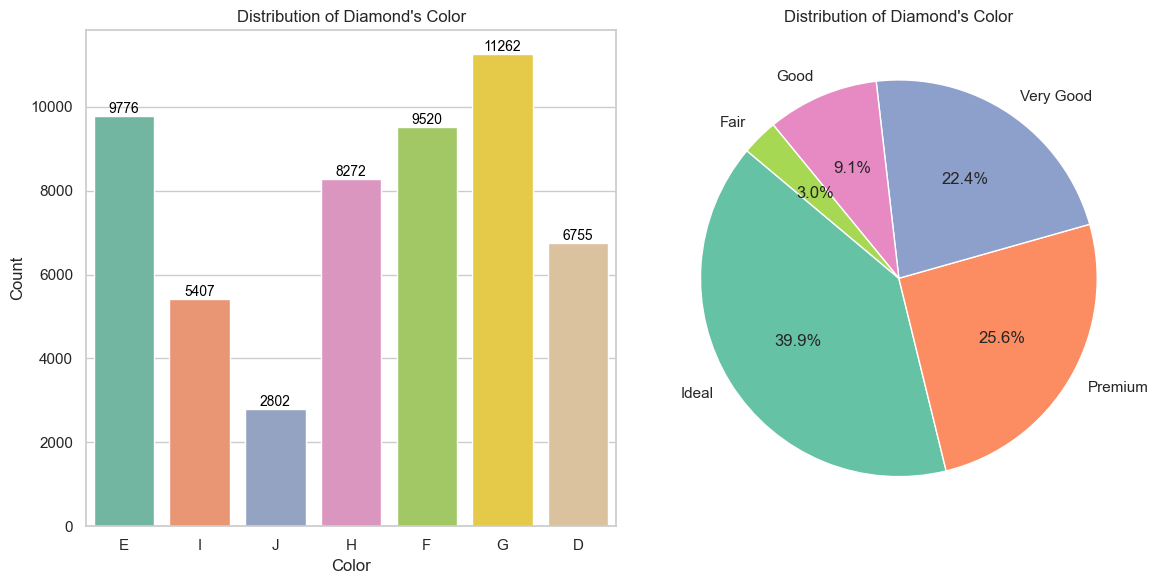

In [59]:
# 'Cut(Quality)'
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot = sns.countplot(x='Color', data=df, palette="Set2")
plt.title("Distribution of Diamond's Color")
plt.xlabel("Color")
plt.ylabel("Count") 
plt.xticks(rotation=0)
for bar in plot.patches:
    plot.annotate(
        format(bar.get_height(), '.0f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', va='bottom', fontsize=10, color='black'
    )



plt.subplot(1,2,2)
Color_counts = df['Color'].value_counts()

plt.pie(
    Cut_counts,
    labels=Cut_counts.index,
    autopct='%1.1f%%',  # Display percentage
    startangle=140,
    colors=sns.color_palette("Set2", len(Color_counts))  # Rotate for better view
)
plt.title("Distribution of Diamond's Color")
plt.tight_layout() 
plt.show()

In [54]:
df["Clarity"].value_counts()

Clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

/var/folders/zf/yzk2b1916zn183knvv60zxg00000gn/T/ipykernel_2557/2553327369.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(x='Clarity', data=df, palette="Set2")


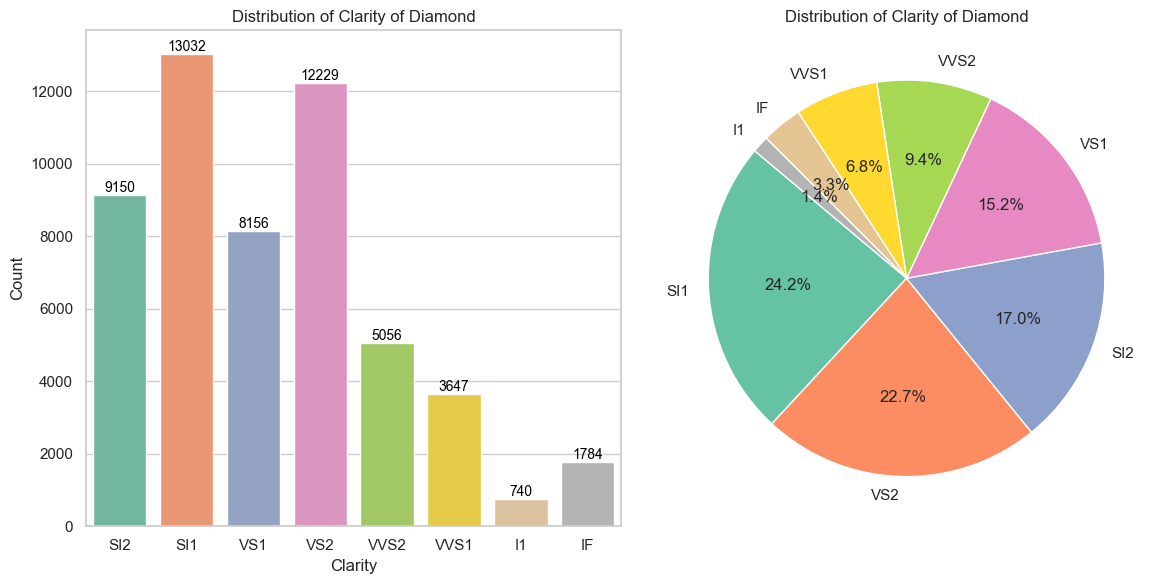

In [57]:
# 'Clarity'
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
plot = sns.countplot(x='Clarity', data=df, palette="Set2")
plt.title("Distribution of Clarity of Diamond")
plt.xlabel("Clarity")
plt.ylabel("Count") 
plt.xticks(rotation=0)
for bar in plot.patches:
    plot.annotate(
        format(bar.get_height(), '.0f'), 
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),  
        ha='center', va='bottom', fontsize=10, color='black'
    )



plt.subplot(1,2,2)
Clarity_counts = df['Clarity'].value_counts()

plt.pie(
    Clarity_counts,
    labels=Clarity_counts.index,
    autopct='%1.1f%%',  # Display percentage
    startangle=140,
    colors=sns.color_palette("Set2", len(Clarity_counts))  # Rotate for better view
)
plt.title("Distribution of Clarity of Diamond")
plt.tight_layout() 
plt.show()

In [60]:
df.head()

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [61]:
df["Depth"].value_counts()

Depth
62.0    2233
61.9    2160
61.8    2069
62.2    2033
62.1    2011
        ... 
71.3       1
44.0       1
53.0       1
53.1       1
54.7       1
Name: count, Length: 184, dtype: int64

/Users/rajchandravanshi/Desktop/Projects/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


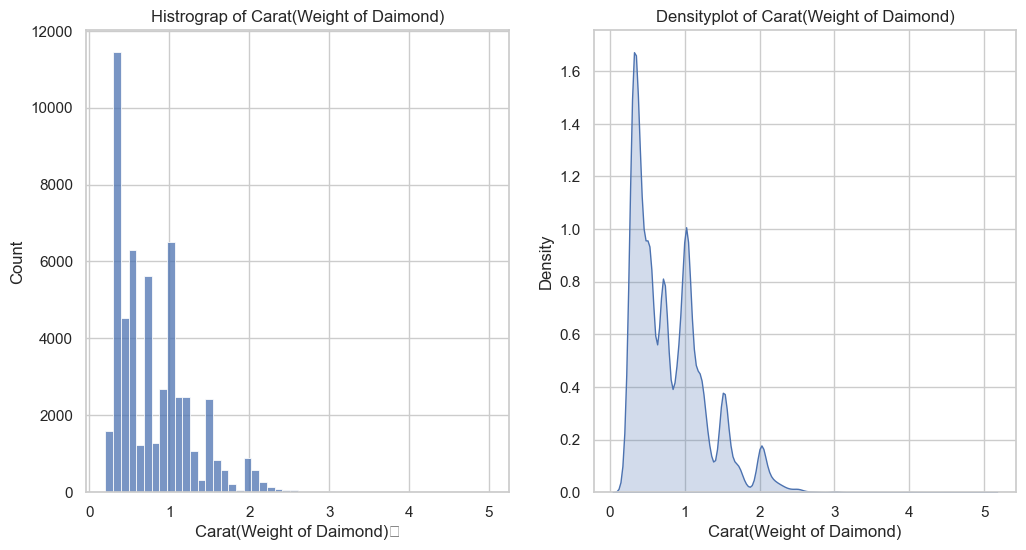

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df["Carat(Weight of Daimond)"], kde = False, bins = 50)
plt.title("Histrograp of Carat(Weight of Daimond)")
plt.xlabel("Carat(Weight of Daimond)	")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Carat(Weight of Daimond)"], fill= True)
plt.title("Densityplot of Carat(Weight of Daimond)")
plt.xlabel("Carat(Weight of Daimond)")
plt.ylabel("Density")
plt.show()

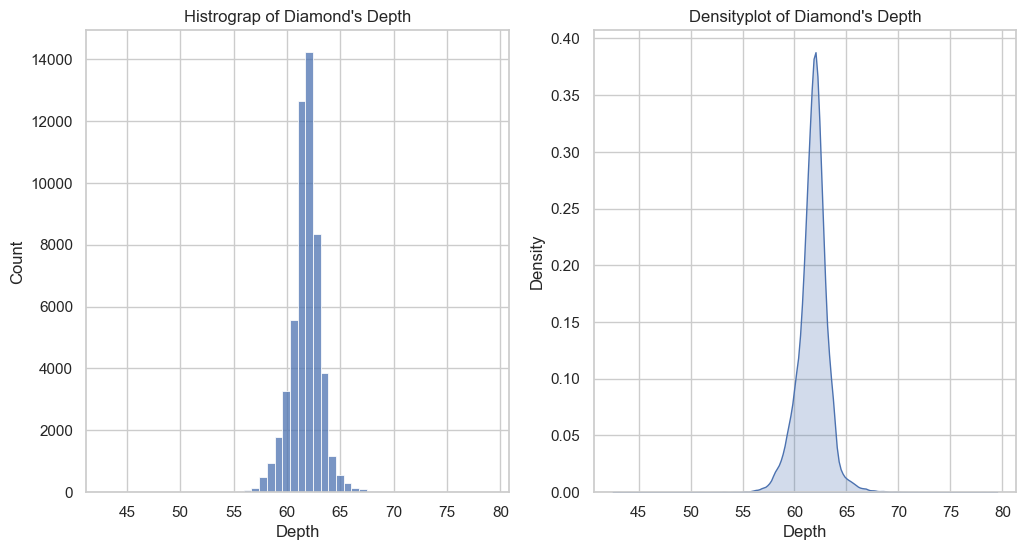

In [ ]:
# Depth of the Diamonds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df["Depth"], kde = False, bins = 50)
plt.title("Histrograp of Diamond's Depth")
plt.xlabel("Depth")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Depth"], fill= True)
plt.title("Densityplot of Diamond's Depth")
plt.xlabel("Depth")
plt.ylabel("Density")
plt.show()

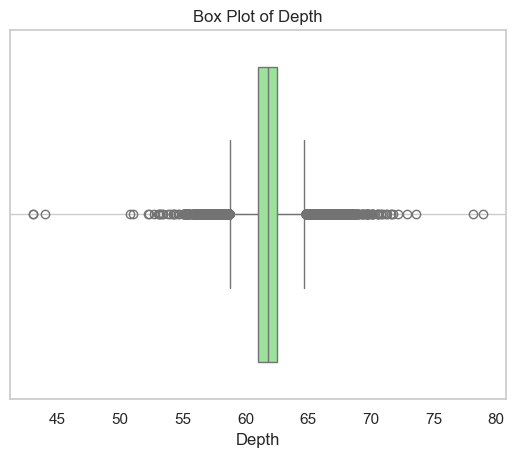

In [82]:
sns.boxplot(x = df["Depth"], color="lightgreen")
plt.grid()
plt.title("Box Plot of Depth")
plt.xlabel("Depth")
plt.show()

In [66]:
Q1 = df["Depth"].quantile(.25)
Q3 = df["Depth"].quantile(.75)

IQR = Q3 - Q1
print("IQR :- ", IQR)
print("Lower Bound:-", Q1 - IQR * 1.5)
print("Upper Bound:-", Q3 + IQR * 1.5)
print("Skewness of the depth is :-", df["Depth"].skew())
print("Kurtosis of the depth is :- ", df["Depth"].kurt())

IQR :-  1.5
Lower Bound:- 58.75
Upper Bound:- 64.75
Skewness of the depth is :- -0.11425026120643586
Kurtosis of the depth is :-  5.412989148779321


In [67]:
Outliers = df[(df["Depth"] < Q1 - 1.5*IQR) | (df["Depth"] > Q3 + 1.5*IQR)]
print(Outliers.shape)
Outliers["Depth"].describe()

(2525, 10)


count    2525.000000
mean       61.189703
std         4.232069
min        43.000000
25%        58.000000
50%        58.600000
75%        65.400000
max        79.000000
Name: Depth, dtype: float64

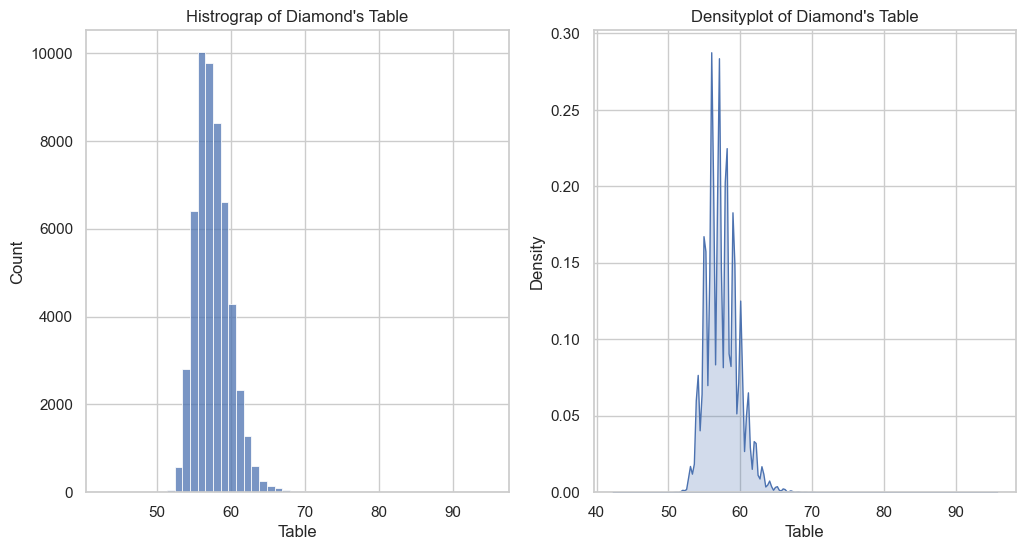

In [ ]:
#  Table of the Diamonds
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df["Table"], kde = False, bins = 50)
plt.title("Histrograp of Diamond's Table")
plt.xlabel("Table")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Table"], fill= True)
plt.title("Densityplot of Diamond's Table")
plt.xlabel("Table")
plt.ylabel("Density")
plt.show()

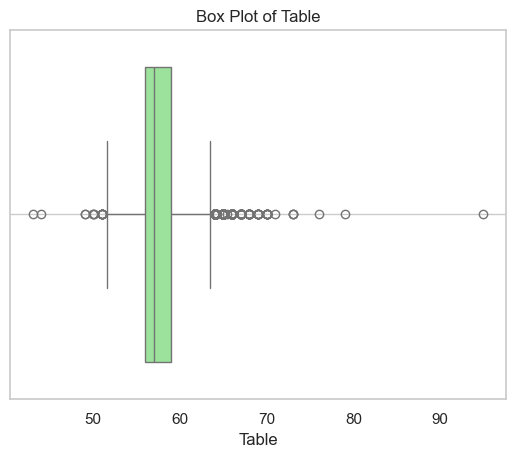

In [81]:
sns.boxplot(x = df["Table"], color="lightgreen")
plt.grid()
plt.title("Box Plot of Table")
plt.xlabel("Table")
plt.show()

In [112]:
Q1 = df["Table"].quantile(.25)
Q3 = df["Table"].quantile(.75)

IQR = Q3 - Q1
print("IQR :- ", IQR)
print("Lower Bound:-", Q1 - IQR * 1.5)
print("Upper Bound:-", Q3 + IQR * 1.5)
print("Skewness of the depth is :-", df["Table"].skew())
print("Kurtosis of the depth is :- ", df["Table"].kurt())

IQR :-  3.0
Lower Bound:- 51.5
Upper Bound:- 63.5
Skewness of the depth is :- 0.7922272870802959
Kurtosis of the depth is :-  2.77535975573494


In [113]:
Outliers_table = df[(df["Table"] < Q1 - 1.5*IQR) | (df["Table"] > Q3 + 1.5*IQR)]
print(Outliers_table .shape)
Outliers_table ["Table"].describe()

(604, 10)


count    604.000000
mean      64.829470
std        3.252435
min       43.000000
25%       64.000000
50%       65.000000
75%       66.000000
max       95.000000
Name: Table, dtype: float64

In [111]:
Outliers_table

,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)


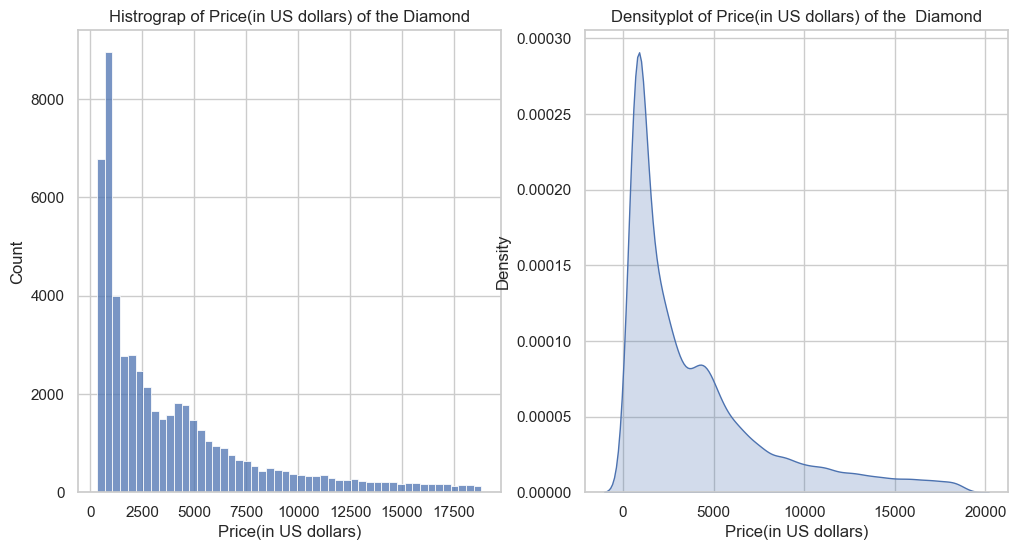

In [72]:
# Price(in US dollars)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df["Price(in US dollars)"], kde = False, bins = 50)
plt.title("Histrograp of Price(in US dollars) of the Diamond")
plt.xlabel("Price(in US dollars)")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(df["Price(in US dollars)"], fill= True)
plt.title("Densityplot of Price(in US dollars) of the  Diamond")
plt.xlabel("Price(in US dollars)")
plt.ylabel("Density")
plt.show()

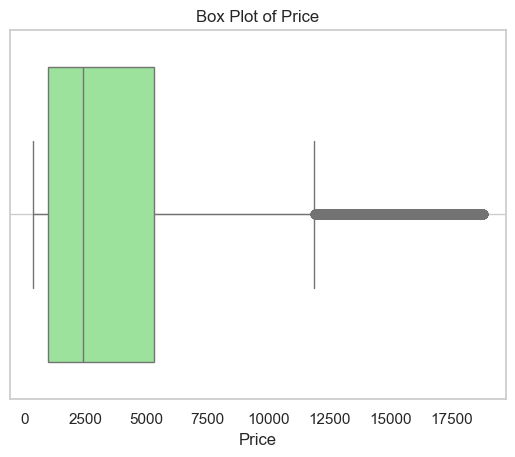

In [ ]:
sns.boxplot(x = df["Price(in US dollars)"], color="lightgreen")
plt.grid()
plt.title("Box Plot of Price(in US dollars)")
plt.xlabel("Price(in US dollars)")
plt.show()

In [114]:
Q1 = df["Price(in US dollars)"].quantile(.25)
Q3 = df["Price(in US dollars)"].quantile(.75)

IQR = Q3 - Q1
print("IQR :- ", IQR)
print("Lower Bound:-", Q1 - IQR * 1.5)
print("Upper Bound:-", Q3 + IQR * 1.5)
print("Skewness of the depth is :-", df["Price(in US dollars)"].skew())
print("Kurtosis of the depth is :- ", df["Price(in US dollars)"].kurt())

IQR :-  4375.75
Lower Bound:- -5612.625
Upper Bound:- 11890.375
Skewness of the depth is :- 1.618239898265432
Kurtosis of the depth is :-  2.1784530585226896


In [115]:
Outliers_price = df[(df["Price(in US dollars)"] < Q1 - 1.5*IQR) | (df["Price(in US dollars)"] > Q3 + 1.5*IQR)]
print(Outliers_price.shape)
Outliers_price["Price(in US dollars)"].describe()

(3523, 10)


count     3523.000000
mean     14945.954300
std       1984.320776
min      11897.000000
25%      13178.000000
50%      14732.000000
75%      16617.500000
max      18823.000000
Name: Price(in US dollars), dtype: float64

In [97]:
Outliers_price.index

Index([23825, 23826, 23827, 23828, 23829, 23830, 23831, 23832, 23833, 23834,
       ...
       27740, 27741, 27742, 27743, 27744, 27745, 27746, 27747, 27748, 27749],
      dtype='int64', length=3523)

In [98]:
Outliers_table.index

Index([23825, 23826, 23827, 23828, 23829, 23830, 23831, 23832, 23833, 23834,
       ...
       27740, 27741, 27742, 27743, 27744, 27745, 27746, 27747, 27748, 27749],
      dtype='int64', length=3523)

In [96]:
Outliers.index

Index([    2,     8,    24,    35,    42,    43,    84,    91,    95,    97,
       ...
       53756, 53757, 53800, 53863, 53879, 53882, 53886, 53890, 53895, 53927],
      dtype='int64', length=2525)

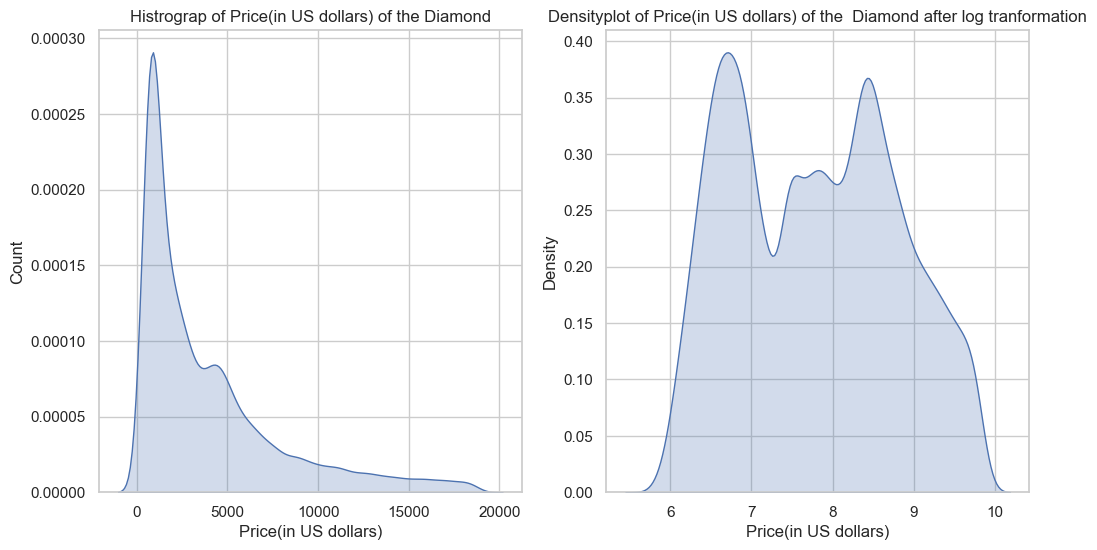

In [74]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.kdeplot(df["Price(in US dollars)"], fill = True)
plt.title("Histrograp of Price(in US dollars) of the Diamond")
plt.xlabel("Price(in US dollars)")
plt.ylabel("Count")

plt.subplot(1,2,2)
sns.kdeplot(np.log1p(df["Price(in US dollars)"]), fill= True)
plt.title("Densityplot of Price(in US dollars) of the  Diamond after log tranformation")
plt.xlabel("Price(in US dollars)")
plt.ylabel("Density")
plt.show()

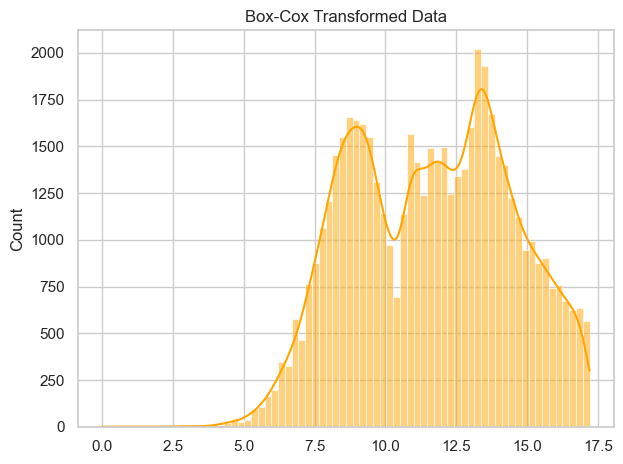

In [ ]:
from scipy.stats import boxcox
data_boxcox, _ = boxcox(df["Price(in US dollars)"] - np.min(df["Price(in US dollars)"]) + 1)
sns.histplot(data_boxcox, kde=True, color='orange')
plt.title("Box-Cox Transformed Data")
plt.tight_layout()
plt.show()

In [100]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')

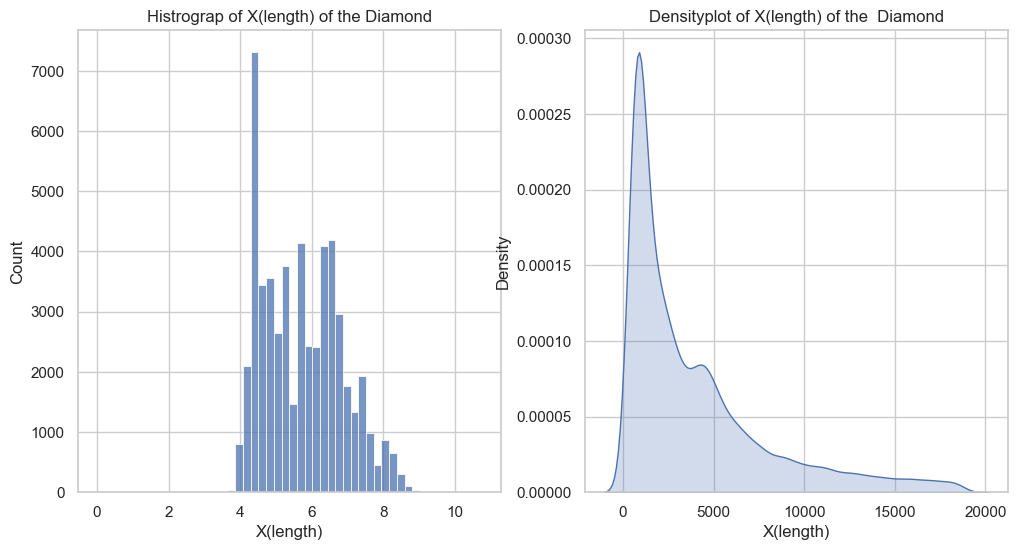

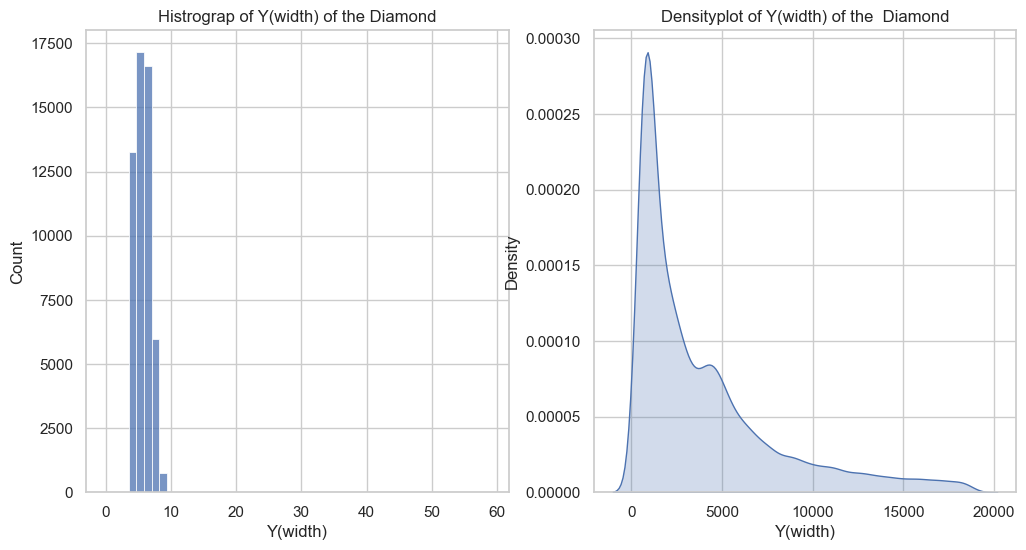

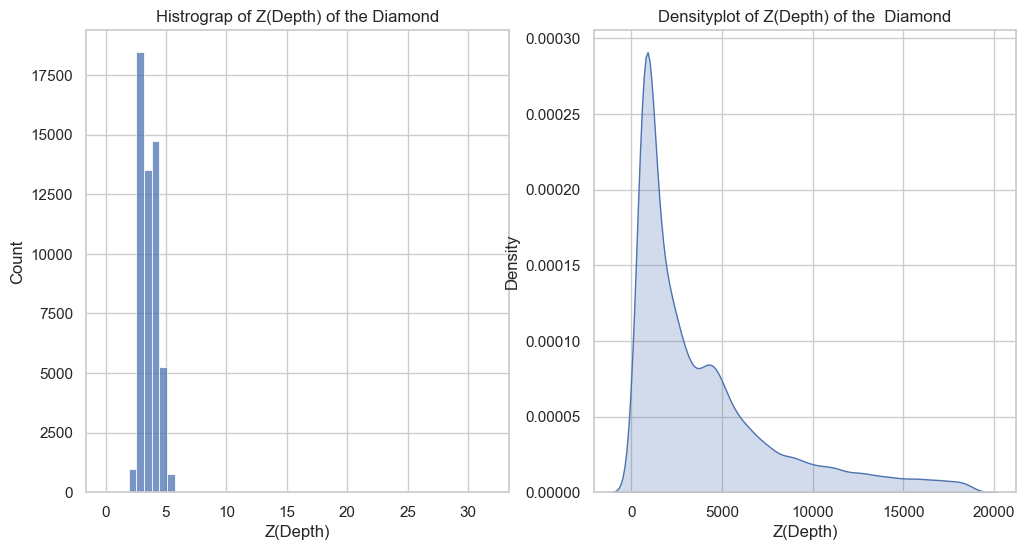

In [102]:
m = ["X(length)", "Y(width)", "Z(Depth)"]
for col in m:
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde = False, bins = 50)
    plt.title(f"Histrograp of {col} of the Diamond")
    plt.xlabel(col)
    plt.ylabel("Count")

    plt.subplot(1,2,2)
    sns.kdeplot(df["Price(in US dollars)"], fill= True)
    plt.title(f"Densityplot of {col} of the  Diamond")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

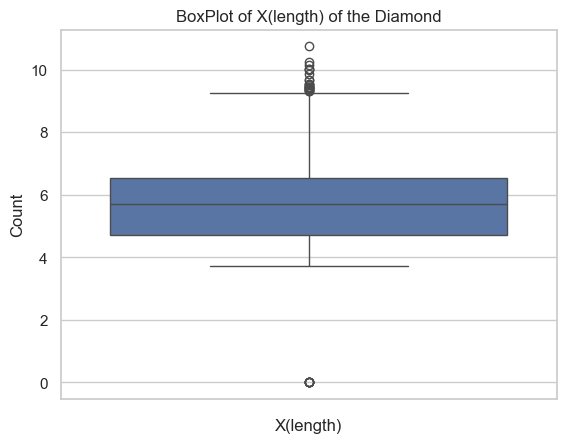

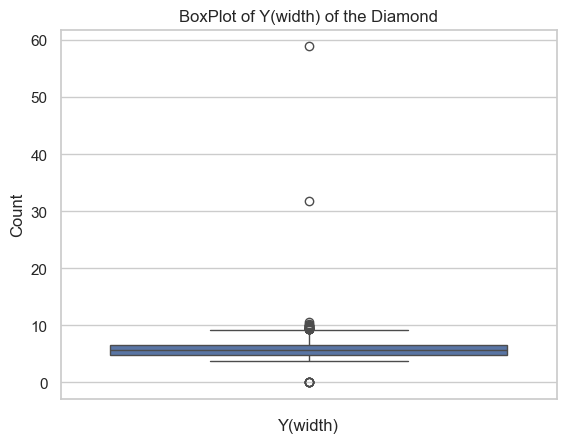

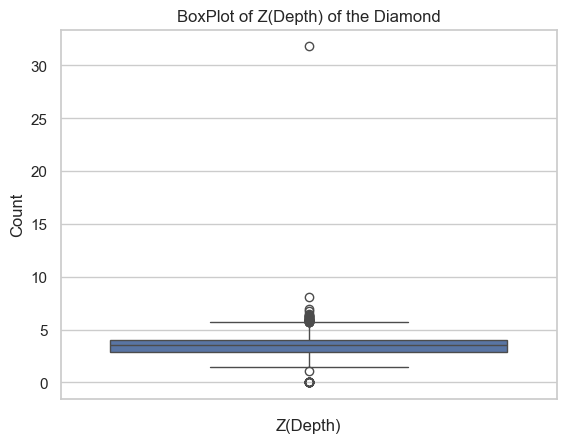

In [104]:
for col in m:
    sns.boxplot(df[col])
    plt.title(f"BoxPlot of {col} of the Diamond")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

In [107]:
df.columns

Index(['Carat(Weight of Daimond)', 'Cut(Quality)', 'Color', 'Clarity', 'Depth',
       'Table', 'Price(in US dollars)', 'X(length)', 'Y(width)', 'Z(Depth)'],
      dtype='object')